# 파일 로드
소설작가분류/</br>
ﾠﾠﾠﾠﾠsamplesubmission.csv</br>
ﾠﾠﾠﾠﾠtrian.csv</br>
ﾠﾠﾠﾠﾠtest_x.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from google.colab import drive
# drive.mount('/gdrive')

In [3]:
# path = '/gdrive/My Drive/data/소설작가분류/'

In [4]:
path = 'data/'

In [5]:
train = pd.read_csv(path + 'train.csv',index_col='index')
test = pd.read_csv(path + 'test_x.csv',index_col='index')
submission = pd.read_csv(path + 'sample_submission.csv')

train.shape, test.shape, submission.shape

((54879, 2), (19617, 1), (19617, 6))

In [6]:
display(train.head())
display(test.head())

,text,author
index,,
0,"He was almost choking. There was so much, so m...",3
1,"“Your sister asked for it, I suppose?”",2
2,"She was engaged one day as she walked, in per...",1
3,"The captain was in the porch, keeping himself ...",4
4,"“Have mercy, gentlemen!” odin flung up his han...",3


,text
index,
0,“Not at all. I think she is one of the most ch...
1,"""No,"" replied he, with sudden consciousness, ""..."
2,As the lady had stated her intention of scream...
3,“And then suddenly in the silence I heard a so...
4,His conviction remained unchanged. So far as I...


In [7]:
submission

,index,0,1,2,3,4
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,2,0,0,0,0,0
3,3,0,0,0,0,0
4,4,0,0,0,0,0
...,...,...,...,...,...,...
19612,19612,0,0,0,0,0
19613,19613,0,0,0,0,0
19614,19614,0,0,0,0,0
19615,19615,0,0,0,0,0


# 전처리

In [8]:
import re

def preprocessing(text):
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)
    # 중복으로 생성된 공백값을 제거합니다.
    text = re.sub('[\s]+', ' ', text)
    # 영문자를 소문자로 만듭니다.
    text = text.lower()
    return text

In [9]:
train['text'] = train['text'].apply(preprocessing)
test['text'] = test['text'].apply(preprocessing)

In [10]:
display(train.head())
display(test.head())

,text,author
index,,
0,he was almost choking there was so much so muc...,3
1,your sister asked for it i suppose,2
2,she was engaged one day as she walked in peru...,1
3,the captain was in the porch keeping himself c...,4
4,have mercy gentlemen odin flung up his hands d...,3


,text
index,
0,not at all i think she is one of the most char...
1,no replied he with sudden consciousness not to...
2,as the lady had stated her intention of scream...
3,and then suddenly in the silence i heard a sou...
4,his conviction remained unchanged so far as i ...


In [11]:
# 불용어 제거
def remove_stopwords(text):
    tokens = text.split(' ')
    stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
                "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
                "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
                "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
                "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
                "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
                "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
                "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
                "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
                "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
                "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    meaningful_words = [w for w in tokens if not w in stopwords]
    return ' '.join(meaningful_words)

In [12]:
train['text'] = train['text'].apply(remove_stopwords)
test['text'] = test['text'].apply(remove_stopwords)

display(train.head())
display(test.head())

,text,author
index,,
0,almost choking much much wanted say strange ex...,3
1,sister asked suppose,2
2,engaged one day walked perusing janes last le...,1
3,captain porch keeping carefully way treacherou...,4
4,mercy gentlemen odin flung hands dont write an...,3


,text
index,
0,not think one charming young ladies ever met m...
1,no replied sudden consciousness not find canno...
2,lady stated intention screaming course screame...
3,suddenly silence heard sound sent heart mouth ...
4,conviction remained unchanged far knowand beli...


In [13]:
X_train = train['text']
X_test = test['text']
y_train = train['author']

X_train.shape, X_test.shape, y_train.shape

((54879,), (19617,), (54879,))

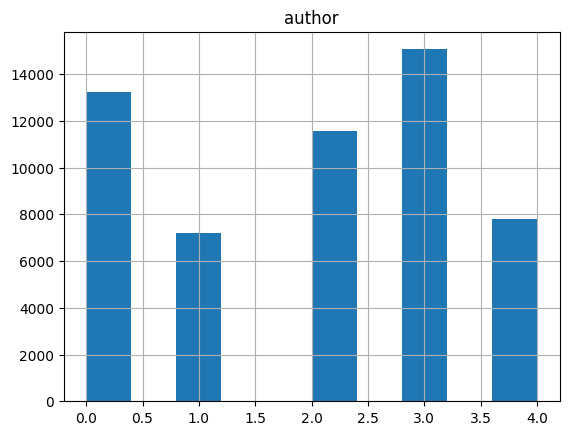

In [41]:
train.hist();

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [15]:
vocab_size = 2000
oov_tok = "<oov>"
tokenizer = Tokenizer(num_words=vocab_size, oov_token = oov_tok)
tokenizer

In [16]:
tokenizer.fit_on_texts(X_train)

In [17]:
pd.DataFrame(tokenizer.word_counts.items()).sort_values(1, ascending=False).set_index(0)

,1
0,
odin,36136
not,17545
said,13443
no,8647
one,7597
...,...
thisfor,1
deada,1
ns,1


In [18]:
train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 150
padding_type = "post"

X_train_sp = pad_sequences(train_sequence, maxlen=max_length, padding=padding_type)
X_test_sp = pad_sequences(test_sequence, maxlen=max_length, padding=padding_type)

X_train_sp.shape, X_test_sp.shape

((54879, 150), (19617, 150))

In [20]:
display(X_train_sp[0, :100])
display(X_test_sp[0, :100])

array([ 142,    1,   21,   21,  317,   22,  230,    1,   37,  453,    1,
       1203,    1, 1702, 1208,   46,   58,    2, 1215,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

array([   3,   24,    6, 1441,   66,  526,   78,  338,   42, 1792,  253,
        850,    1,   44, 1308,   44,    1,    1, 1122,  654,  118,  134,
          1,  106,  556,    1,    1,  237,  359,  278,  115,  183,   26,
        656,    1,    1, 1460,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, GRU, Bidirectional, LSTM, Dropout, BatchNormalization

In [22]:
embedding_dim = 16

In [24]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, name='embedding', input_length=max_length),
    tf.keras.layers.Bidirectional(GRU(units=64, return_sequences=True)),
    tf.keras.layers.Bidirectional(GRU(units=64, return_sequences=True)),
    tf.keras.layers.Bidirectional(GRU(units=32)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(5, activation='softmax')
])

2022-12-18 10:23:43.129547: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-18 10:23:44.106336: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1553] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2938 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:3f:00.0, compute capability: 7.5


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 16)           32000     
                                                                 
 bidirectional (Bidirectiona  (None, 150, 128)         31488     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 150, 128)         74496     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               31104     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train_val, X_valid, y_train_val, y_valid = train_test_split(
#     X_train_sp, y_train, test_size=0.2, random_state=42, stratify=y_train
# )
# X_train_val.shape, X_valid.shape, y_train_val.shape, y_valid.shape

In [ ]:
# history = model.fit(X_train_val, y_train_val, 
#                     validation_data=(X_valid, y_valid), 
#                     epochs=10, callbacks=[early_stop])

In [29]:
history = model.fit(X_train_sp, y_train, 
                    epochs=10,
                    validation_split=0.2, 
                    callbacks=[early_stop])

Epoch 1/10


2022-12-18 10:23:54.546726: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


1372/1372 [==============================] - 79s 50ms/step - loss: 1.3110 - accuracy: 0.4586 - val_loss: 1.1031 - val_accuracy: 0.5562
Epoch 2/10
1372/1372 [==============================] - 67s 49ms/step - loss: 1.0852 - accuracy: 0.5750 - val_loss: 0.9789 - val_accuracy: 0.6259
Epoch 3/10
1372/1372 [==============================] - 67s 49ms/step - loss: 0.9896 - accuracy: 0.6186 - val_loss: 0.9902 - val_accuracy: 0.6182
Epoch 4/10
1372/1372 [==============================] - 71s 52ms/step - loss: 0.9541 - accuracy: 0.6377 - val_loss: 0.9443 - val_accuracy: 0.6306
Epoch 5/10
1372/1372 [==============================] - 62s 45ms/step - loss: 0.9245 - accuracy: 0.6508 - val_loss: 0.9306 - val_accuracy: 0.6447
Epoch 6/10
1372/1372 [==============================] - 67s 49ms/step - loss: 0.8975 - accuracy: 0.6639 - val_loss: 0.9336 - val_accuracy: 0.6488
Epoch 7/10
1372/1372 [==============================] - 66s 48ms/step - loss: 0.8729 - accuracy: 0.6756 - val_loss: 0.9422 - val_accura

In [30]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,1.311031,0.458602,1.103106,0.556214
1,1.085166,0.575018,0.978869,0.625911
2,0.989621,0.618591,0.990151,0.618167
3,0.954094,0.637701,0.944322,0.630558
4,0.924503,0.650753,0.930648,0.644679
5,0.897495,0.663918,0.933610,0.648779
6,0.872939,0.675603,0.942228,0.644953
7,0.843384,0.684987,0.912827,0.656341
8,0.817008,0.696034,0.908245,0.658983
9,0.799720,0.705760,0.919313,0.661808


<AxesSubplot:>

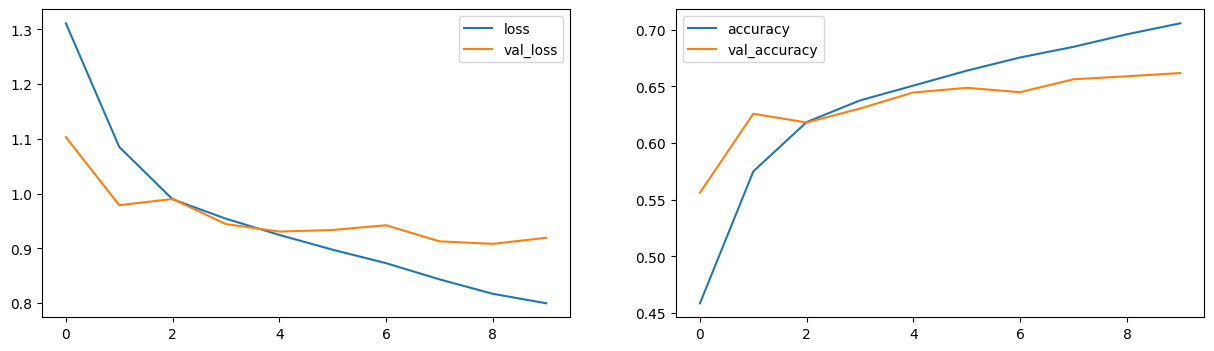

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["accuracy", "val_accuracy"]].plot(ax=axes[1])

In [37]:
y_pred = model.predict(X_test_sp)
y_pred

614/614 [==============================] - 10s 17ms/step


array([[7.3710032e-02, 9.0091658e-01, 1.5620693e-02, 5.1537664e-03,
        4.5989659e-03],
       [1.2770262e-01, 8.0603307e-01, 2.2959206e-02, 5.3508482e-03,
        3.7954308e-02],
       [8.5374480e-01, 9.7035747e-03, 1.4266962e-02, 4.0186150e-03,
        1.1826602e-01],
       ...,
       [4.1937549e-03, 9.9569857e-01, 4.0207109e-05, 2.6531239e-05,
        4.0924300e-05],
       [4.8056743e-03, 9.9499857e-01, 7.3738775e-05, 6.5071508e-05,
        5.6908026e-05],
       [3.3139384e-01, 6.8031527e-02, 4.8450342e-01, 2.0243740e-02,
        9.5827453e-02]], dtype=float32)

In [38]:
submission[['0','1','2','3','4']] = y_pred
submission

,index,0,1,2,3,4
0,0,0.073710,0.900917,0.015621,0.005154,0.004599
1,1,0.127703,0.806033,0.022959,0.005351,0.037954
2,2,0.853745,0.009704,0.014267,0.004019,0.118266
3,3,0.019039,0.018481,0.850539,0.001846,0.110096
4,4,0.449200,0.110816,0.175721,0.104178,0.160084
...,...,...,...,...,...,...
19612,19612,0.004683,0.995206,0.000043,0.000032,0.000037
19613,19613,0.039311,0.003928,0.063163,0.001580,0.892018
19614,19614,0.004194,0.995699,0.000040,0.000027,0.000041
19615,19615,0.004806,0.994999,0.000074,0.000065,0.000057


In [39]:
submission.to_csv('submission.csv', index = False)

In [40]:
pd.read_csv('submission.csv')

,index,0,1,2,3,4
0,0,0.073710,0.900917,0.015621,0.005154,0.004599
1,1,0.127703,0.806033,0.022959,0.005351,0.037954
2,2,0.853745,0.009704,0.014267,0.004019,0.118266
3,3,0.019039,0.018481,0.850539,0.001846,0.110096
4,4,0.449200,0.110816,0.175721,0.104178,0.160084
...,...,...,...,...,...,...
19612,19612,0.004683,0.995206,0.000043,0.000032,0.000037
19613,19613,0.039311,0.003928,0.063163,0.001580,0.892018
19614,19614,0.004194,0.995699,0.000040,0.000027,0.000041
19615,19615,0.004806,0.994999,0.000074,0.000065,0.000057
